# Netflix Project

- The exploration should have a goal. As you explore the data, keep in mind that you want to answer which type of shows to produce and how to grow the business.
- Ensure each recommendation is backed by data. The company is looking for data-driven insights, not personal opinions or anecdotes.
- Assume that you are presenting your findings to business executives who have only a basic understanding of data science. Avoid unnecessary technical jargon.
- Start by exploring a few questions: What type of content is available in different countries?
- How has the number of movies released per year changed over the last 20-30 years?
- Comparison of tv shows vs. movies.
- What is the best time to launch a TV show?
- Analysis of actors/directors of different types of shows/movies.

- Show_id: Unique ID for every Movie / Tv Show
- Type: Identifier - A Movie or TV Show
- Title: Title of the Movie / Tv Show
- Director: Director of the Movie
- Cast: Actors involved in the movie/show
- Country: Country where the movie/show was produced
- Date_added: Date it was added on Netflix
- Release_year: Actual Release year of the movie/show
- Rating: TV Rating of the movie/show
- Duration: Total Duration - in minutes or number of seasons
- Listed_in: Genre
- Description: The summary description

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

In [4]:
df['show_id'].nunique()

8807

In [5]:
df['title'].nunique()

8807

In [6]:
df.drop(columns='title',inplace=True)

In [7]:
df.head()

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df.drop(columns='description',inplace=True)
df.head()

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
dtypes: int64(1), object(9)
memory usage: 688.2+ KB


In [10]:
df.head(10)

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
5,s6,TV Show,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
6,s7,Movie,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies
7,s8,Movie,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
8,s9,TV Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
9,s10,Movie,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas"


In [11]:
df['cast'].isna().sum()

825

In [12]:
df['cast'].replace(np.nan,'Others',inplace=True)

In [13]:
df['cast'].isna().sum()

0

In [14]:
df['cast']=df['cast'].apply(lambda x : x.split(', '))

In [15]:
df['cast'][2]

['Sami Bouajila',
 'Tracy Gotoas',
 'Samuel Jouy',
 'Nabiha Akkari',
 'Sofia Lesaffre',
 'Salim Kechiouche',
 'Noureddine Farihi',
 'Geert Van Rampelberg',
 'Bakary Diombera']

In [16]:
df.head()

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Kirsten Johnson,[Others],United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,NaN,[Others],NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [17]:
df[(df['director'].isna()) & (df['type']=='TV Show')]

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in
1,s2,TV Show,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
3,s4,TV Show,NaN,[Others],NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
10,s11,TV Show,NaN,[Others],NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S..."
14,s15,TV Show,NaN,[Others],NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries"
...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,NaN,"[Mike Liscio, Emily Bauer, Billy Bob Thompson,...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV"
8796,s8797,TV Show,NaN,"[Gökhan Atalay, Payidar Tüfekçioglu, Baran Akb...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8797,s8798,TV Show,NaN,"[Michael Johnston, Jessica Gee-George, Christi...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV
8800,s8801,TV Show,NaN,"[Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."


In [18]:
df[(df['director'].isna()) & (df['type']=='Movie')]

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in
404,s405,Movie,NaN,[Others],NaN,"July 22, 2021",2021,TV-MA,85 min,Documentaries
470,s471,Movie,NaN,"[David Spade, London Hughes, Fortune Feimster]",NaN,"July 13, 2021",2021,TV-14,39 min,Movies
483,s484,Movie,NaN,"[Fatih Şahin, Ece Çeşmioğlu, Halit Özgür Sarı,...",NaN,"July 9, 2021",2021,TV-MA,102 min,"Dramas, International Movies, Romantic Movies"
641,s642,Movie,NaN,[Others],NaN,"June 24, 2021",2021,PG,97 min,"Documentaries, Sports Movies"
717,s718,Movie,NaN,"[Andy Puddicombe, Evelyn Lewis Prieto, Ginger ...",NaN,"June 15, 2021",2021,TV-G,273 min,Documentaries
...,...,...,...,...,...,...,...,...,...,...
8231,s8232,Movie,NaN,[Chow Yun Fat],Hong Kong,"September 20, 2018",1983,TV-14,103 min,"Action & Adventure, Dramas, International Movies"
8268,s8269,Movie,NaN,[Others],United Kingdom,"June 23, 2018",2016,TV-MA,75 min,"Action & Adventure, Independent Movies, Intern..."
8330,s8331,Movie,NaN,"[Zo In-sung, Nam Joo-hyuk, Park Sung-woong, Ba...",South Korea,"April 8, 2019",2018,TV-MA,136 min,"Action & Adventure, Dramas, International Movies"
8647,s8648,Movie,NaN,"[Vijay Maurya, Naman Jain, Usha Nadkarni, Muke...",India,"January 15, 2017",2015,TV-14,89 min,"Dramas, International Movies"


In [19]:
df['director'].replace(np.nan,'No Director',inplace=True)

In [20]:
df.head(30)

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Kirsten Johnson,[Others],United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,No Director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,No Director,[Others],NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,No Director,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
5,s6,TV Show,Mike Flanagan,"[Kate Siegel, Zach Gilford, Hamish Linklater, ...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
6,s7,Movie,"Robert Cullen, José Luis Ucha","[Vanessa Hudgens, Kimiko Glenn, James Marsden,...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies
7,s8,Movie,Haile Gerima,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
8,s9,TV Show,Andy Devonshire,"[Mel Giedroyc, Sue Perkins, Mary Berry, Paul H...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
9,s10,Movie,Theodore Melfi,"[Melissa McCarthy, Chris O'Dowd, Kevin Kline, ...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas"


In [21]:
df.tail(30)

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in
8777,s8778,Movie,Saratswadee Wongsomphet,"[Sushar Manaying, Supanart Jittaleela, Arisara...",Thailand,"December 6, 2018",2010,TV-PG,111 min,"International Movies, LGBTQ Movies, Romantic M..."
8778,s8779,Movie,Saratswadee Wongsomphet,"[Supanart Jittaleela, Sushar Manaying, Nisa Bo...",Thailand,"November 8, 2018",2012,TV-PG,112 min,"International Movies, LGBTQ Movies, Romantic M..."
8779,s8780,Movie,Kirati Nakintanon,"[Supanart Jittaleela, Pimpakan Bangchawong, Ch...",Thailand,"November 8, 2018",2015,TV-PG,107 min,"International Movies, LGBTQ Movies, Romantic M..."
8780,s8781,TV Show,No Director,"[Johnny Yong Bosch, J.W. Terry, Alicyn Packard...",United States,"April 1, 2016",2015,TV-Y7,1 Season,"Anime Series, Kids' TV"
8781,s8782,Movie,Mark Risley,"[Johnny Yong Bosch, Joey D'Auria, Alicyn Packa...","Japan, United States","December 1, 2016",2016,TV-Y7,96 min,"Anime Features, Children & Family Movies"
8782,s8783,Movie,Kevin Smith,"[Harley Quinn Smith, Lily-Rose Depp, Johnny De...",United States,"December 2, 2016",2016,PG-13,88 min,"Comedies, Horror Movies, Independent Movies"
8783,s8784,TV Show,No Director,"[Eileen Stevens, Alyson Leigh Rosenfeld, Sarah...",NaN,"June 23, 2018",2016,TV-Y,1 Season,Kids' TV
8784,s8785,Movie,No Director,"[Eileen Stevens, Alyson Leigh Rosenfeld, Sarah...","Russia, Spain","June 23, 2018",2015,TV-Y,78 min,Children & Family Movies
8785,s8786,TV Show,No Director,"[Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur...",NaN,"June 7, 2018",2016,TV-Y7,1 Season,Kids' TV
8786,s8787,Movie,James Brown,"[Lily O'Regan, Jeannettsy Enriquez Borges, Joe...",United Kingdom,"December 31, 2017",2017,TV-G,87 min,Children & Family Movies


In [22]:
df[5950:6000]

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in
5950,s5951,Movie,Richard Michaels,"[Mario Van Peebles, Susan Ruttan, Lane R. Davi...",United States,"October 1, 2011",1991,TV-PG,93 min,"Dramas, Sports Movies"
5951,s5952,Movie,Linda Otto,"[Jill Clayburgh, Brad Davis, Sam Behrens]",United States,"October 1, 2011",1990,TV-14,95 min,Dramas
5952,s5953,Movie,Roger Young,"[William Devane, Jeri Ryan, Michele Abrams, Ni...",United States,"October 1, 2011",1991,TV-14,93 min,"Dramas, Thrillers"
5953,s5954,Movie,"Rob LaDuca, Robert C. Ramirez","[Ben Affleck, Mark Hamill, Richard Herd, Maure...","United States, France, United Kingdom","September 27, 2011",2000,TV-PG,75 min,"Children & Family Movies, Dramas, Faith & Spir..."
5954,s5955,Movie,Icíar Bollaín,"[Luis Tosar, Gael García Bernal, Juan Carlos A...","Spain, Mexico, France","May 17, 2011",2010,TV-MA,103 min,"Dramas, International Movies"
5955,s5956,Movie,Joe Dante,"[Corey Feldman, Tony Todd, Tara Leigh, Erin Wa...",United States,"November 18, 2009",2009,TV-MA,29 min,Horror Movies
5956,s5957,Movie,Ole Bornedal,"[Anders W. Berthelsen, Rebecka Hemse, Nikolaj ...",Denmark,"May 5, 2009",2007,TV-MA,104 min,"Dramas, International Movies"
5957,s5958,Movie,Sorin Dan Mihalcescu,"[Barbara King, Shaana Diya, John Krisiukenas, ...",United States,"January 1, 2008",2006,TV-MA,81 min,"Dramas, Independent Movies, Thrillers"
5958,s5959,Movie,Shane Acker,"[Elijah Wood, John C. Reilly, Jennifer Connell...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
5959,s5960,Movie,Robert Luketic,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   director      8807 non-null   object
 3   cast          8807 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
dtypes: int64(1), object(9)
memory usage: 688.2+ KB


In [24]:
df[df['date_added'].isna()]

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in
6066,s6067,TV Show,No Director,"[Daniel Radcliffe, Jon Hamm, Adam Godley, Chri...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas"
6174,s6175,TV Show,No Director,[Anthony Bourdain],United States,NaN,2018,TV-PG,5 Seasons,Docuseries
6795,s6796,TV Show,No Director,"[Kelsey Grammer, Jane Leeves, David Hyde Pierc...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies"
6806,s6807,TV Show,No Director,"[Jennifer Aniston, Courteney Cox, Lisa Kudrow,...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies"
6901,s6902,TV Show,No Director,"[Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, A...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows"
7196,s7197,TV Show,No Director,[Igor Dmitriev],NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV
7254,s7255,TV Show,No Director,"[Eugenio Derbez, Consuelo Duval, Luis Manuel Á...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh..."
7406,s7407,TV Show,No Director,"[Marc Maron, Judd Hirsch, Josh Brener, Nora Ze...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies
7847,s7848,TV Show,No Director,"[Burnie Burns, Jason Saldaña, Gustavo Sorola, ...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
8182,s8183,TV Show,No Director,"[Luke Jurevicius, Craig Behenna, Charlotte Ham...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies"


In [25]:
df[df['release_year']==2015].tail(31)

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in
8548,s8549,Movie,Mark Neveldine,"[Olivia Taylor Dudley, Michael Peña, Dougray S...",United States,"April 20, 2020",2015,PG-13,91 min,"Horror Movies, Thrillers"
8550,s8551,Movie,"Ossama Abu El Atta, Tarek Al Eryan","[Mona Zaki, Asser Yassin, Amr Saad, Salwa Moha...",Egypt,"April 18, 2019",2015,TV-14,98 min,"Action & Adventure, Dramas, International Movies"
8558,s8559,Movie,Robert Eggers,"[Anya Taylor-Joy, Ralph Ineson, Kate Dickie, H...","United Kingdom, Canada, United States","September 17, 2018",2015,R,92 min,"Horror Movies, Independent Movies"
8575,s8576,TV Show,No Director,"[Jin-mo Joo, Sa-rang Kim, Junior, Ja-in Lee, S...",South Korea,"May 22, 2017",2015,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman..."
8577,s8578,Movie,Wim Bonte,[Others],Belgium,"December 15, 2015",2015,NR,77 min,"Documentaries, International Movies, Music & M..."
8578,s8579,Movie,Raam Reddy,"[Thammegowda S., Channegowda, Abhishek H.N., P...","India, United States","March 9, 2017",2015,TV-MA,123 min,"Dramas, Independent Movies, International Movies"
8599,s8600,TV Show,Michael Cumming,"[Matt Berry, Robert Bathurst, Doon Mackichan, ...",United Kingdom,"September 1, 2017",2015,TV-MA,3 Seasons,"British TV Shows, Classic & Cult TV, TV Comedies"
8610,s8611,Movie,Daniel Benmayor,"[Luciano Acuna Jr., Adam Rayner, Marie Avgerop...",United States,"October 22, 2019",2015,PG-13,94 min,Action & Adventure
8620,s8621,Movie,"Jon Reiner, Brad Rothschild",[Others],Canada,"November 1, 2016",2015,TV-PG,82 min,Documentaries
8625,s8626,Movie,Don Michael Paul,"[Michael Gross, Jamie Kennedy, Ernest Ndhlovu,...","South Africa, United States","January 1, 2020",2015,PG-13,99 min,"Comedies, Horror Movies, Sci-Fi & Fantasy"


In [26]:
df['date_added'].fillna('September 24, 2021',inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   director      8807 non-null   object
 3   cast          8807 non-null   object
 4   country       7976 non-null   object
 5   date_added    8807 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
dtypes: int64(1), object(9)
memory usage: 688.2+ KB


In [28]:
df[df['rating'].isna()]

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in
5989,s5990,Movie,No Director,"[Oprah Winfrey, Ava DuVernay]",NaN,"January 26, 2017",2017,NaN,37 min,Movies
6827,s6828,TV Show,No Director,"[Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, K...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows"
7312,s7313,TV Show,No Director,"[Flynn Curry, Olivia Deeble, Madison Lu, Oisín...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies"
7537,s7538,Movie,Alessandro Pepe,"[Leone Frisa, Paolo Vaccarino, Francesco Migli...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas


In [29]:
df[df['listed_in'].str.contains("Kids' TV")]['rating'].value_counts()

TV-Y7       189
TV-Y        176
TV-G         43
TV-PG        41
TV-Y7-FV      1
Name: rating, dtype: int64

In [30]:
df.loc[7312,'rating']='TV-Y7'

In [31]:
df[df['rating'].isna()]

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in
5989,s5990,Movie,No Director,"[Oprah Winfrey, Ava DuVernay]",NaN,"January 26, 2017",2017,NaN,37 min,Movies
6827,s6828,TV Show,No Director,"[Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, K...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows"
7537,s7538,Movie,Alessandro Pepe,"[Leone Frisa, Paolo Vaccarino, Francesco Migli...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas


In [32]:
df[df['listed_in'].str.contains("Movies")]['rating'].value_counts()

TV-MA       1459
TV-14       1182
R            451
TV-PG        424
PG           253
PG-13        252
TV-Y7        139
TV-Y         131
TV-G         104
NR            54
G             39
TV-Y7-FV       5
NC-17          3
UR             2
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [33]:
df.loc[5989,'rating']='TV-MA'

In [34]:
df[df['rating'].isna()]

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in
6827,s6828,TV Show,No Director,"[Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, K...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows"
7537,s7538,Movie,Alessandro Pepe,"[Leone Frisa, Paolo Vaccarino, Francesco Migli...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas


In [35]:
df[df['listed_in'].str.contains("Dramas")]['rating'].value_counts()

TV-MA    1264
TV-14     962
R         376
TV-PG     249
PG-13     192
PG         69
TV-G       36
NR         28
G           6
TV-Y        3
UR          2
NC-17       1
TV-Y7       1
Name: rating, dtype: int64

In [36]:
df.loc[7537,'rating']='TV-MA'

In [37]:
df[df['rating'].isna()]

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in
6827,s6828,TV Show,No Director,"[Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, K...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows"


In [38]:
df[df['listed_in'].str.contains("Anime Series, International TV Shows")]['rating'].value_counts()

TV-14    57
TV-MA    46
TV-PG     9
TV-Y7     2
Name: rating, dtype: int64

In [39]:
df.loc[6827,'rating']='TV-14'

In [40]:
df['rating'].isna().isna().sum()

0

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   director      8807 non-null   object
 3   cast          8807 non-null   object
 4   country       7976 non-null   object
 5   date_added    8807 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8807 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
dtypes: int64(1), object(9)
memory usage: 688.2+ KB


In [42]:
df[df['duration'].isna()]

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in
5541,s5542,Movie,Louis C.K.,[Louis C.K.],United States,"April 4, 2017",2017,74 min,NaN,Movies
5794,s5795,Movie,Louis C.K.,[Louis C.K.],United States,"September 16, 2016",2010,84 min,NaN,Movies
5813,s5814,Movie,Louis C.K.,[Louis C.K.],United States,"August 15, 2016",2015,66 min,NaN,Movies


In [43]:
df[df['duration'].isna()]['rating']

5541    74 min
5794    84 min
5813    66 min
Name: rating, dtype: object

In [44]:
df.loc[df['duration'].isna(),'duration']=df[df['duration'].isna()]['rating']

In [45]:
df[df['duration'].isna()]

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in


In [46]:
df.loc[df['rating'].str.contains('min'),'rating']='TV-MA'

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   director      8807 non-null   object
 3   cast          8807 non-null   object
 4   country       7976 non-null   object
 5   date_added    8807 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8807 non-null   object
 8   duration      8807 non-null   object
 9   listed_in     8807 non-null   object
dtypes: int64(1), object(9)
memory usage: 688.2+ KB


In [48]:
df.loc[df['country'].isna(),'country']='Country Not Mentioned'

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   director      8807 non-null   object
 3   cast          8807 non-null   object
 4   country       8807 non-null   object
 5   date_added    8807 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8807 non-null   object
 8   duration      8807 non-null   object
 9   listed_in     8807 non-null   object
dtypes: int64(1), object(9)
memory usage: 688.2+ KB


In [50]:
df.head()

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Kirsten Johnson,[Others],United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,No Director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",Country Not Mentioned,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,No Director,[Others],Country Not Mentioned,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,No Director,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [51]:
df['listed_in']=df['listed_in'].apply(lambda x : x.split(', '))

In [52]:
df['listed_in'][2]

['Crime TV Shows', 'International TV Shows', 'TV Action & Adventure']

In [53]:
df.head()

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Kirsten Johnson,[Others],United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries]
1,s2,TV Show,No Director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",Country Not Mentioned,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,No Director,[Others],Country Not Mentioned,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]"
4,s5,TV Show,No Director,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV..."


In [54]:
df[df['director'].apply(lambda x : True if ',' in x else False)]

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in
6,s7,Movie,"Robert Cullen, José Luis Ucha","[Vanessa Hudgens, Kimiko Glenn, James Marsden,...",Country Not Mentioned,"September 24, 2021",2021,PG,91 min,[Children & Family Movies]
16,s17,Movie,"Pedro de Echave García, Pablo Azorín Williams",[Others],Country Not Mentioned,"September 22, 2021",2020,TV-MA,67 min,"[Documentaries, International Movies]"
23,s24,Movie,"Alex Woo, Stanley Moore","[Maisie Benson, Paul Killam, Kerry Gudjohnsen,...",Country Not Mentioned,"September 21, 2021",2021,TV-Y,61 min,[Children & Family Movies]
30,s31,Movie,"Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket C...","[Abhishek Banerjee, Rinku Rajguru, Delzad Hiwa...",Country Not Mentioned,"September 17, 2021",2021,TV-14,111 min,"[Dramas, Independent Movies, International Mov..."
68,s69,Movie,"Hanns-Bruno Kammertöns, Vanessa Nöcker, Michae...",[Michael Schumacher],Country Not Mentioned,"September 15, 2021",2021,TV-14,113 min,"[Documentaries, International Movies, Sports M..."
...,...,...,...,...,...,...,...,...,...,...
8727,s8728,Movie,"Ritu Sarin, Tenzing Sonam",[Others],"United Kingdom, India, United States","December 25, 2016",2013,NR,75 min,"[Documentaries, International Movies]"
8728,s8729,Movie,"Heidi Brandenburg, Mathew Orzel",[Others],"Peru, United States, United Kingdom","November 30, 2016",2016,TV-14,103 min,"[Documentaries, International Movies]"
8737,s8738,Movie,"Milla Harrison-Hansley, Alicky Sussman",[Giles Yeo],United Kingdom,"February 1, 2019",2016,TV-14,50 min,[Documentaries]
8739,s8740,Movie,"Frank Capra, Anatole Litvak",[Others],United States,"March 31, 2017",1943,TV-PG,82 min,[Documentaries]


In [55]:
df['director']=df['director'].apply(lambda x : x.split(', '))

In [56]:
df[df['director'].apply(lambda x : True if ',' in x else False)]

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in


In [57]:
df.head()

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,[Kirsten Johnson],[Others],United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries]
1,s2,TV Show,[No Director],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",Country Not Mentioned,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,[No Director],[Others],Country Not Mentioned,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]"
4,s5,TV Show,[No Director],"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV..."


In [58]:
def function(x):
    length=int(x.split()[0])
    if length<=30:
        return "0-30"
    elif length<=60:
        return "31-60"
    elif length<=90:
        return "61-90"
    elif length<=120:
        return "91-120"
    elif length<=150:
        return "121-150"
    elif length<=180:
        return "151-180"
    else:
        return "Above 180"        

In [59]:
df.loc[df['type']=='Movie','duration'] = df.loc[df['type']=='Movie','duration'].apply(function)

In [60]:
df.loc[df['type']=='Movie','duration'].value_counts()

91-120       2996
61-90        1506
121-150       897
31-60         357
151-180       198
0-30          130
Above 180      47
Name: duration, dtype: int64

# Un-Nest

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   director      8807 non-null   object
 3   cast          8807 non-null   object
 4   country       8807 non-null   object
 5   date_added    8807 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8807 non-null   object
 8   duration      8807 non-null   object
 9   listed_in     8807 non-null   object
dtypes: int64(1), object(9)
memory usage: 688.2+ KB


In [62]:
df.head()

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,[Kirsten Johnson],[Others],United States,"September 25, 2021",2020,PG-13,61-90,[Documentaries]
1,s2,TV Show,[No Director],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",Country Not Mentioned,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,[No Director],[Others],Country Not Mentioned,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]"
4,s5,TV Show,[No Director],"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV..."


In [63]:
df.shape

(8807, 10)

In [64]:
constraint=df['cast'].tolist()
constraint
new_df = pd.DataFrame(constraint,index=df['show_id']) 
new_df.head()
cast_df = pd.DataFrame(new_df.stack(),columns=['Cast']).reset_index().iloc[:,[0,2]]
cast_df

,show_id,Cast
0,s1,Others
1,s2,Ama Qamata
2,s2,Khosi Ngema
3,s2,Gail Mabalane
4,s2,Thabang Molaba
...,...,...
64946,s8807,Manish Chaudhary
64947,s8807,Meghna Malik
64948,s8807,Malkeet Rauni
64949,s8807,Anita Shabdish


In [65]:
other_df=df[['show_id','type','country','date_added','release_year','rating','duration']]
other_df

,show_id,type,country,date_added,release_year,rating,duration
0,s1,Movie,United States,"September 25, 2021",2020,PG-13,61-90
1,s2,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
2,s3,TV Show,Country Not Mentioned,"September 24, 2021",2021,TV-MA,1 Season
3,s4,TV Show,Country Not Mentioned,"September 24, 2021",2021,TV-MA,1 Season
4,s5,TV Show,India,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...
8802,s8803,Movie,United States,"November 20, 2019",2007,R,151-180
8803,s8804,TV Show,Country Not Mentioned,"July 1, 2019",2018,TV-Y7,2 Seasons
8804,s8805,Movie,United States,"November 1, 2019",2009,R,61-90
8805,s8806,Movie,United States,"January 11, 2020",2006,PG,61-90


In [66]:
df1=pd.merge(left=cast_df,right=other_df,on='show_id')
df1

,show_id,Cast,type,country,date_added,release_year,rating,duration
0,s1,Others,Movie,United States,"September 25, 2021",2020,PG-13,61-90
1,s2,Ama Qamata,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
2,s2,Khosi Ngema,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
3,s2,Gail Mabalane,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
4,s2,Thabang Molaba,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...
64946,s8807,Manish Chaudhary,Movie,India,"March 2, 2019",2015,TV-14,91-120
64947,s8807,Meghna Malik,Movie,India,"March 2, 2019",2015,TV-14,91-120
64948,s8807,Malkeet Rauni,Movie,India,"March 2, 2019",2015,TV-14,91-120
64949,s8807,Anita Shabdish,Movie,India,"March 2, 2019",2015,TV-14,91-120


In [67]:
constraint=df['director'].tolist()
constraint
new_df = pd.DataFrame(constraint,index=df['show_id']) 
new_df.head()
director_df = pd.DataFrame(new_df.stack(),columns=['Director']).reset_index().iloc[:,[0,2]]
director_df

,show_id,Director
0,s1,Kirsten Johnson
1,s2,No Director
2,s3,Julien Leclercq
3,s4,No Director
4,s5,No Director
...,...,...
9607,s8803,David Fincher
9608,s8804,No Director
9609,s8805,Ruben Fleischer
9610,s8806,Peter Hewitt


In [68]:
df1=pd.merge(left=director_df,right=df1,on='show_id')
df1

,show_id,Director,Cast,type,country,date_added,release_year,rating,duration
0,s1,Kirsten Johnson,Others,Movie,United States,"September 25, 2021",2020,PG-13,61-90
1,s2,No Director,Ama Qamata,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
2,s2,No Director,Khosi Ngema,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
3,s2,No Director,Gail Mabalane,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
4,s2,No Director,Thabang Molaba,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...
70807,s8807,Mozez Singh,Manish Chaudhary,Movie,India,"March 2, 2019",2015,TV-14,91-120
70808,s8807,Mozez Singh,Meghna Malik,Movie,India,"March 2, 2019",2015,TV-14,91-120
70809,s8807,Mozez Singh,Malkeet Rauni,Movie,India,"March 2, 2019",2015,TV-14,91-120
70810,s8807,Mozez Singh,Anita Shabdish,Movie,India,"March 2, 2019",2015,TV-14,91-120


In [69]:
df1.head()

,show_id,Director,Cast,type,country,date_added,release_year,rating,duration
0,s1,Kirsten Johnson,Others,Movie,United States,"September 25, 2021",2020,PG-13,61-90
1,s2,No Director,Ama Qamata,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
2,s2,No Director,Khosi Ngema,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
3,s2,No Director,Gail Mabalane,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
4,s2,No Director,Thabang Molaba,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons


In [70]:
constraint=df['listed_in'].tolist()
constraint
new_df = pd.DataFrame(constraint,index=df['show_id']) 
new_df.head()
listed_in_df = pd.DataFrame(new_df.stack(),columns=['listed_in']).reset_index().iloc[:,[0,2]]
listed_in_df

,show_id,listed_in
0,s1,Documentaries
1,s2,International TV Shows
2,s2,TV Dramas
3,s2,TV Mysteries
4,s3,Crime TV Shows
...,...,...
19318,s8806,Children & Family Movies
19319,s8806,Comedies
19320,s8807,Dramas
19321,s8807,International Movies


In [71]:
final_df=pd.merge(left=df1,right=listed_in_df,on='show_id')
final_df

,show_id,Director,Cast,type,country,date_added,release_year,rating,duration,listed_in
0,s1,Kirsten Johnson,Others,Movie,United States,"September 25, 2021",2020,PG-13,61-90,Documentaries
1,s2,No Director,Ama Qamata,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
2,s2,No Director,Ama Qamata,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas
3,s2,No Director,Ama Qamata,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries
4,s2,No Director,Khosi Ngema,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
...,...,...,...,...,...,...,...,...,...,...
161211,s8807,Mozez Singh,Anita Shabdish,Movie,India,"March 2, 2019",2015,TV-14,91-120,International Movies
161212,s8807,Mozez Singh,Anita Shabdish,Movie,India,"March 2, 2019",2015,TV-14,91-120,Music & Musicals
161213,s8807,Mozez Singh,Chittaranjan Tripathy,Movie,India,"March 2, 2019",2015,TV-14,91-120,Dramas
161214,s8807,Mozez Singh,Chittaranjan Tripathy,Movie,India,"March 2, 2019",2015,TV-14,91-120,International Movies


# Analysis

In [72]:
final_df.head()

,show_id,Director,Cast,type,country,date_added,release_year,rating,duration,listed_in
0,s1,Kirsten Johnson,Others,Movie,United States,"September 25, 2021",2020,PG-13,61-90,Documentaries
1,s2,No Director,Ama Qamata,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
2,s2,No Director,Ama Qamata,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas
3,s2,No Director,Ama Qamata,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries
4,s2,No Director,Khosi Ngema,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows


In [73]:
final_df.shape

(161216, 10)

In [74]:
final_df['Year Added']=final_df['date_added'].apply(lambda x : int(x.split()[2]))

In [75]:
final_df['Month Added']=final_df['date_added'].apply(lambda x : x.split()[0])

In [76]:
final_df.drop(columns='date_added',inplace=True)

# Question 1 : 
### How has the number of movies and TV Shows released per year changed over the last 10 years?

In [77]:
final_df.head()

,show_id,Director,Cast,type,country,release_year,rating,duration,listed_in,Year Added,Month Added
0,s1,Kirsten Johnson,Others,Movie,United States,2020,PG-13,61-90,Documentaries,2021,September
1,s2,No Director,Ama Qamata,TV Show,South Africa,2021,TV-MA,2 Seasons,International TV Shows,2021,September
2,s2,No Director,Ama Qamata,TV Show,South Africa,2021,TV-MA,2 Seasons,TV Dramas,2021,September
3,s2,No Director,Ama Qamata,TV Show,South Africa,2021,TV-MA,2 Seasons,TV Mysteries,2021,September
4,s2,No Director,Khosi Ngema,TV Show,South Africa,2021,TV-MA,2 Seasons,International TV Shows,2021,September


In [78]:
final_df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [79]:
release_year_plot=final_df.groupby(by=['type','release_year']).nunique()['show_id']
release_year_plot

type     release_year
Movie    1942              2
         1943              3
         1944              3
         1945              3
         1946              1
                        ... 
TV Show  2017            265
         2018            380
         2019            397
         2020            436
         2021            315
Name: show_id, Length: 119, dtype: int64

In [80]:
movies_year_wise=release_year_plot.loc['Movie'].sort_values(ascending=False)
movies_year_wise

release_year
2018    767
2017    767
2016    658
2019    633
2020    517
       ... 
1961      1
1963      1
1966      1
1947      1
1946      1
Name: show_id, Length: 73, dtype: int64

In [81]:
tvshows_year_wise=release_year_plot.loc['TV Show'].sort_values(ascending=False)
tvshows_year_wise

release_year
2020    436
2019    397
2018    380
2021    315
2017    265
2016    244
2015    162
2014     88
2012     64
2013     63
2011     40
2010     40
2009     34
2008     23
2007     14
2006     14
2005     13
2003     10
2004      9
2002      7
1999      7
2001      5
1997      4
1993      4
1998      4
2000      4
1990      3
1992      3
1996      3
1994      2
1995      2
1988      2
1986      2
1977      1
1963      1
1946      1
1967      1
1972      1
1974      1
1989      1
1979      1
1981      1
1985      1
1991      1
1945      1
1925      1
Name: show_id, dtype: int64

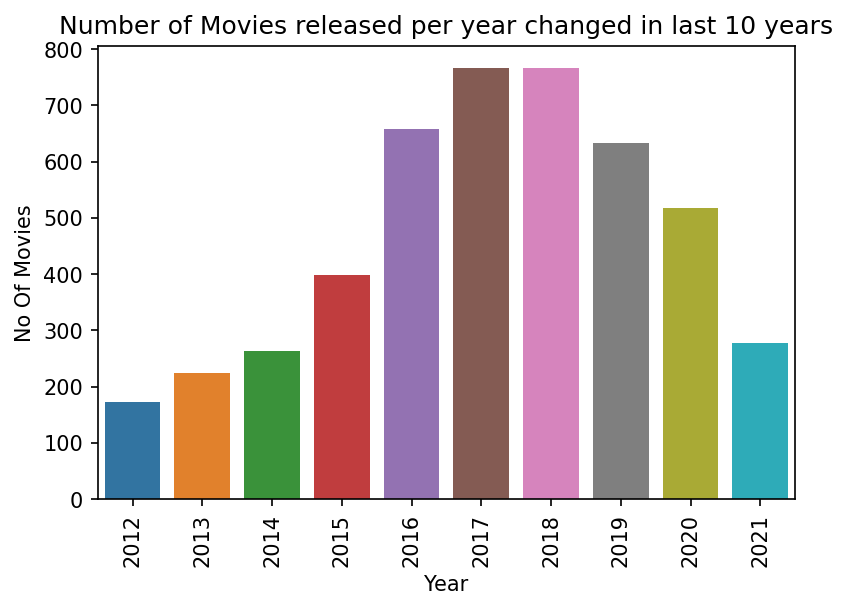

In [82]:
plt.figure(dpi=150)
sns.barplot(x=movies_year_wise.index[:10],
            y=movies_year_wise[:10])
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('No Of Movies')
plt.title('Number of Movies released per year changed in last 10 years')
plt.savefig('Image1.jpg')
plt.show()


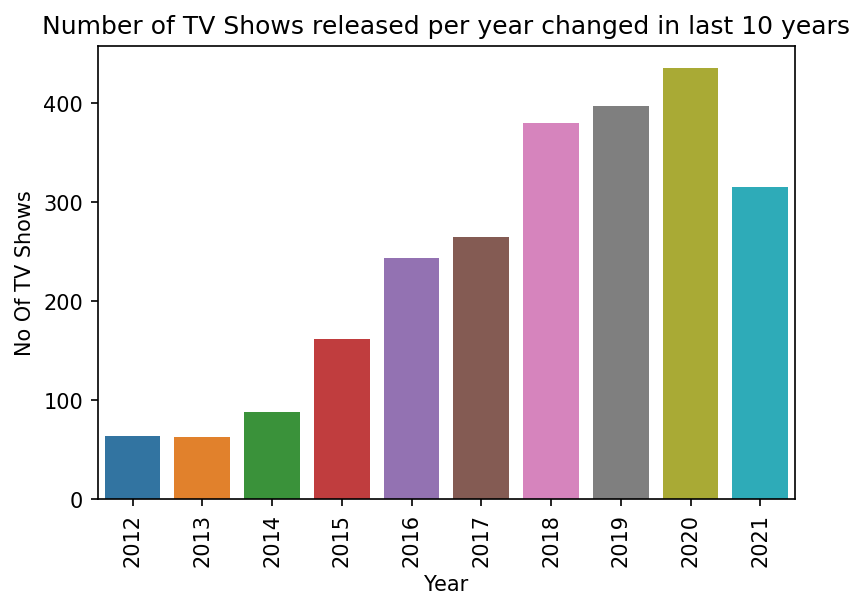

In [83]:
plt.figure(dpi=150)
sns.barplot(x=tvshows_year_wise.index[:10],
            y=tvshows_year_wise[:10])
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('No Of TV Shows')
plt.title('Number of TV Shows released per year changed in last 10 years')
plt.savefig('Image2.jpg')
plt.show()


# Question 2 : 
### How has the number of Movies and TV Shows added to Netflix per year changed over the last 10 years?

In [84]:
final_df.head()

,show_id,Director,Cast,type,country,release_year,rating,duration,listed_in,Year Added,Month Added
0,s1,Kirsten Johnson,Others,Movie,United States,2020,PG-13,61-90,Documentaries,2021,September
1,s2,No Director,Ama Qamata,TV Show,South Africa,2021,TV-MA,2 Seasons,International TV Shows,2021,September
2,s2,No Director,Ama Qamata,TV Show,South Africa,2021,TV-MA,2 Seasons,TV Dramas,2021,September
3,s2,No Director,Ama Qamata,TV Show,South Africa,2021,TV-MA,2 Seasons,TV Mysteries,2021,September
4,s2,No Director,Khosi Ngema,TV Show,South Africa,2021,TV-MA,2 Seasons,International TV Shows,2021,September


In [85]:
added_year_plot=final_df.groupby(by=['type','Year Added']).nunique()['show_id']
added_year_plot

type     Year Added
Movie    2008             1
         2009             2
         2010             1
         2011            13
         2012             3
         2013             6
         2014            19
         2015            56
         2016           253
         2017           839
         2018          1237
         2019          1424
         2020          1284
         2021           993
TV Show  2008             1
         2013             5
         2014             5
         2015            26
         2016           176
         2017           349
         2018           412
         2019           592
         2020           595
         2021           515
Name: show_id, dtype: int64

In [86]:
movies_added_per_year=added_year_plot.loc['Movie'].sort_values(ascending=False)
movies_added_per_year

Year Added
2019    1424
2020    1284
2018    1237
2021     993
2017     839
2016     253
2015      56
2014      19
2011      13
2013       6
2012       3
2009       2
2008       1
2010       1
Name: show_id, dtype: int64

In [87]:
tvshow_added_per_year=added_year_plot.loc['TV Show'].sort_index(ascending=False)
tvshow_added_per_year

Year Added
2021    515
2020    595
2019    592
2018    412
2017    349
2016    176
2015     26
2014      5
2013      5
2008      1
Name: show_id, dtype: int64

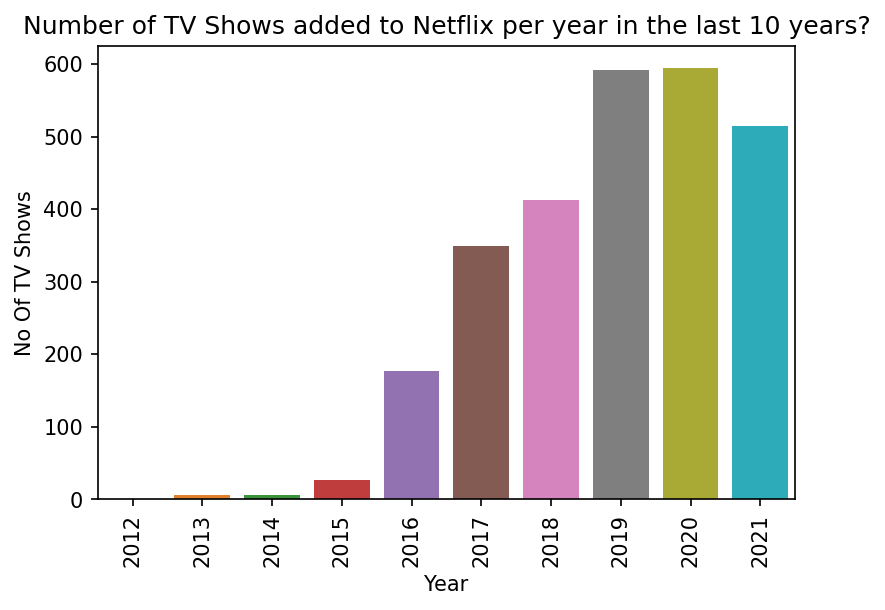

In [88]:
plt.figure(dpi=150)
sns.barplot(x=list(tvshow_added_per_year.index[:9])+[2012],
            y=list(tvshow_added_per_year[:9])+[0])
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('No Of TV Shows')
plt.title('Number of TV Shows added to Netflix per year in the last 10 years?')
plt.savefig('Image3.jpg')
plt.show()


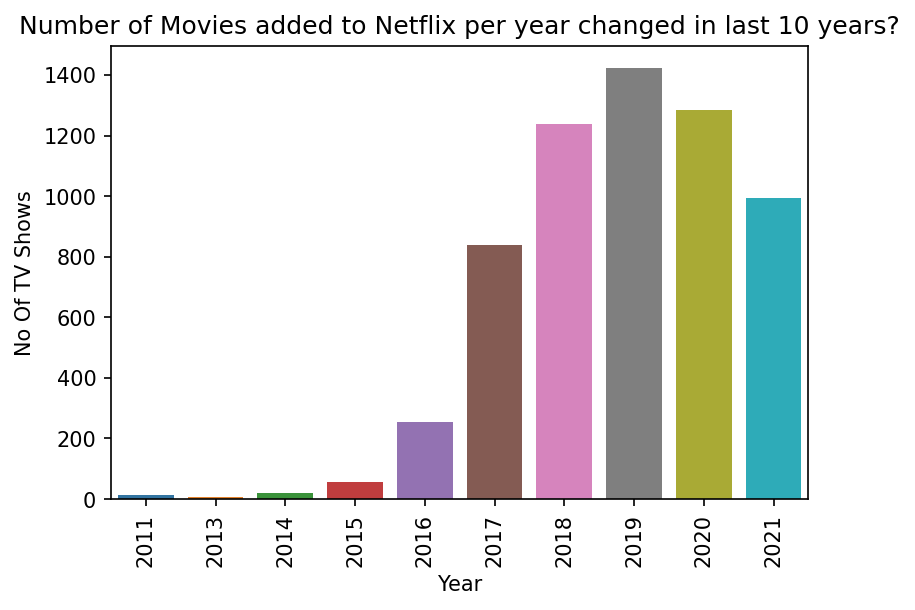

In [89]:
plt.figure(dpi=150)
sns.barplot(x=movies_added_per_year.index[:10],
            y=movies_added_per_year[:10])
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('No Of TV Shows')
plt.title('Number of Movies added to Netflix per year changed in last 10 years?')
plt.savefig('Image4.jpg')
plt.show()


# Question 3 : 
### In which months does Netflix add maximum content?

In [90]:
final_df.head()

,show_id,Director,Cast,type,country,release_year,rating,duration,listed_in,Year Added,Month Added
0,s1,Kirsten Johnson,Others,Movie,United States,2020,PG-13,61-90,Documentaries,2021,September
1,s2,No Director,Ama Qamata,TV Show,South Africa,2021,TV-MA,2 Seasons,International TV Shows,2021,September
2,s2,No Director,Ama Qamata,TV Show,South Africa,2021,TV-MA,2 Seasons,TV Dramas,2021,September
3,s2,No Director,Ama Qamata,TV Show,South Africa,2021,TV-MA,2 Seasons,TV Mysteries,2021,September
4,s2,No Director,Khosi Ngema,TV Show,South Africa,2021,TV-MA,2 Seasons,International TV Shows,2021,September


In [91]:
month_year_plot=final_df.groupby(by='Month Added').nunique()['show_id'].sort_values(ascending=False)
month_year_plot

Month Added
July         827
December     813
September    780
April        764
October      760
August       755
March        742
January      738
June         728
November     705
May          632
February     563
Name: show_id, dtype: int64

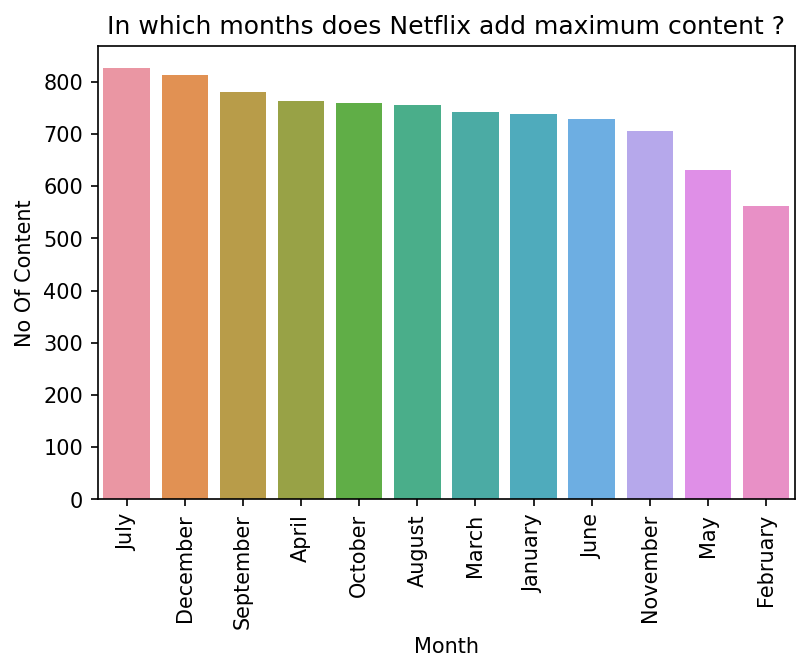

In [92]:
plt.figure(dpi=150)
sns.barplot(x=list(month_year_plot.index),y=list(month_year_plot))
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('No Of Content')
plt.title('In which months does Netflix add maximum content ?')
plt.savefig('Image5.jpg')
plt.show()


# Question 4 : 
### Which directors are the most popular?

In [93]:
final_df.head()

,show_id,Director,Cast,type,country,release_year,rating,duration,listed_in,Year Added,Month Added
0,s1,Kirsten Johnson,Others,Movie,United States,2020,PG-13,61-90,Documentaries,2021,September
1,s2,No Director,Ama Qamata,TV Show,South Africa,2021,TV-MA,2 Seasons,International TV Shows,2021,September
2,s2,No Director,Ama Qamata,TV Show,South Africa,2021,TV-MA,2 Seasons,TV Dramas,2021,September
3,s2,No Director,Ama Qamata,TV Show,South Africa,2021,TV-MA,2 Seasons,TV Mysteries,2021,September
4,s2,No Director,Khosi Ngema,TV Show,South Africa,2021,TV-MA,2 Seasons,International TV Shows,2021,September


In [94]:
director_plot=final_df.groupby('Director').nunique()['show_id'].sort_values(ascending=False)
director_plot

Director
No Director                2634
Rajiv Chilaka                22
Jan Suter                    21
Raúl Campos                  19
Suhas Kadav                  16
                           ... 
Brandon Camp                  1
Juan Antin                    1
Juan Antonio de la Riva       1
Juan Camilo Pinzon            1
María Jose Cuevas             1
Name: show_id, Length: 4994, dtype: int64

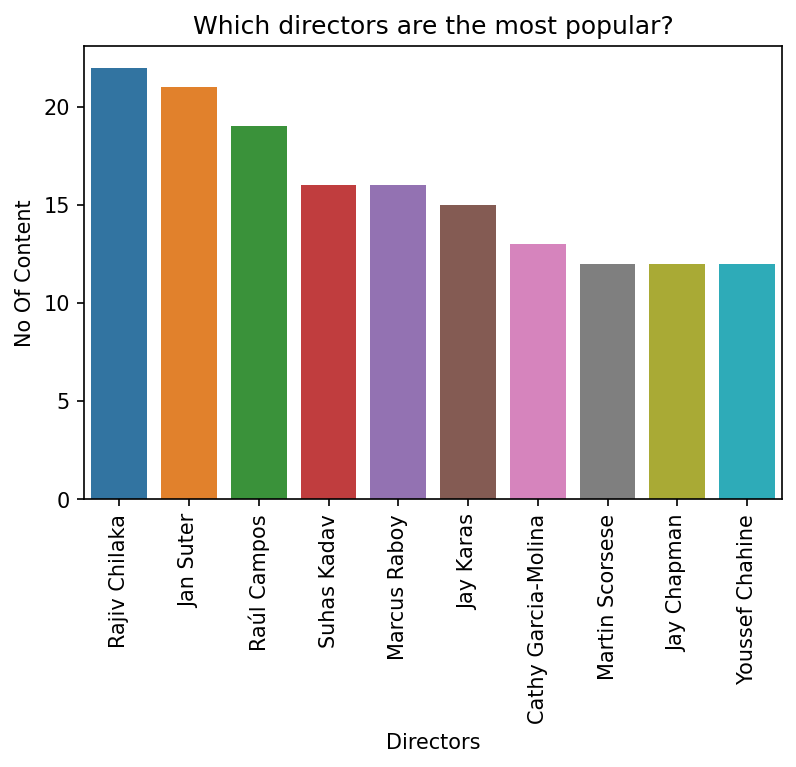

In [95]:
plt.figure(dpi=150)
sns.barplot(x=list(director_plot.index[1:11]),y=list(director_plot[1:11]))
plt.xticks(rotation=90)
plt.xlabel('Directors')
plt.ylabel('No Of Content')
plt.title('Which directors are the most popular?')
plt.savefig('Image6.jpg')
plt.show()


# Question 5 :  
### Which cast members are the most popular?

In [96]:
cast_plot=final_df.groupby('Cast').nunique()['show_id'].sort_values(ascending=False)
cast_plot

Cast
Others              825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
                   ... 
Jamie Lee             1
Jamie Kenna           1
Jamie Kaler           1
Jamie Johnston        1
Ṣọpẹ́ Dìrísù          1
Name: show_id, Length: 36440, dtype: int64

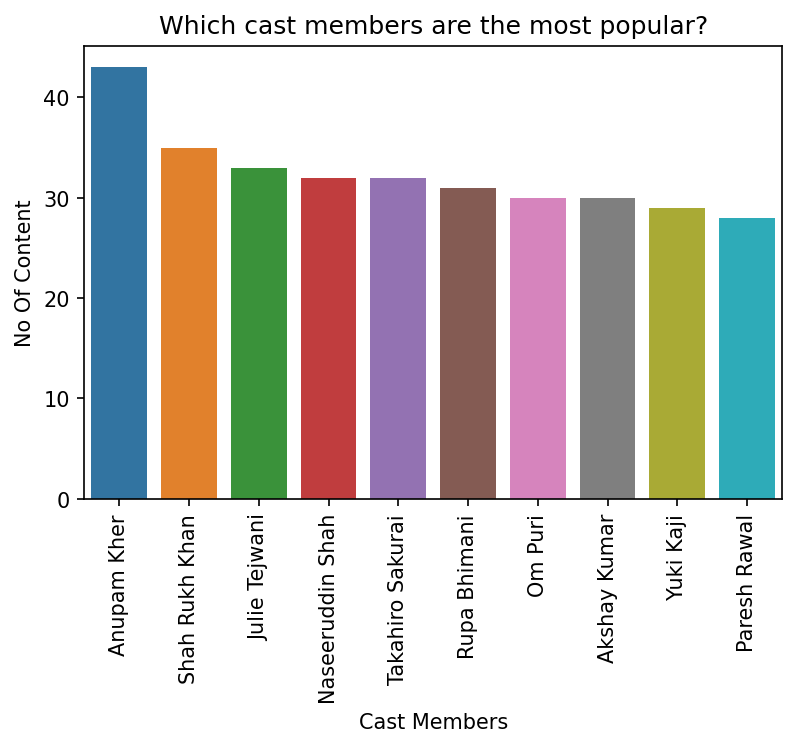

In [97]:
plt.figure(dpi=150)
sns.barplot(x=list(cast_plot.index[1:11]),y=list(cast_plot[1:11]))
plt.xticks(rotation=90)
plt.xlabel('Cast Members')
plt.ylabel('No Of Content')
plt.title('Which cast members are the most popular?')
plt.savefig('Image7.jpg')
plt.show()


# Question 6 : 
### What type of content is mostly added in Netflix in the last 3 years?

In [98]:
cast_plot=final_df[final_df['Year Added']>=2019].groupby('type').nunique()['show_id'].sort_values(ascending=False)
cast_plot

type
Movie      3701
TV Show    1702
Name: show_id, dtype: int64

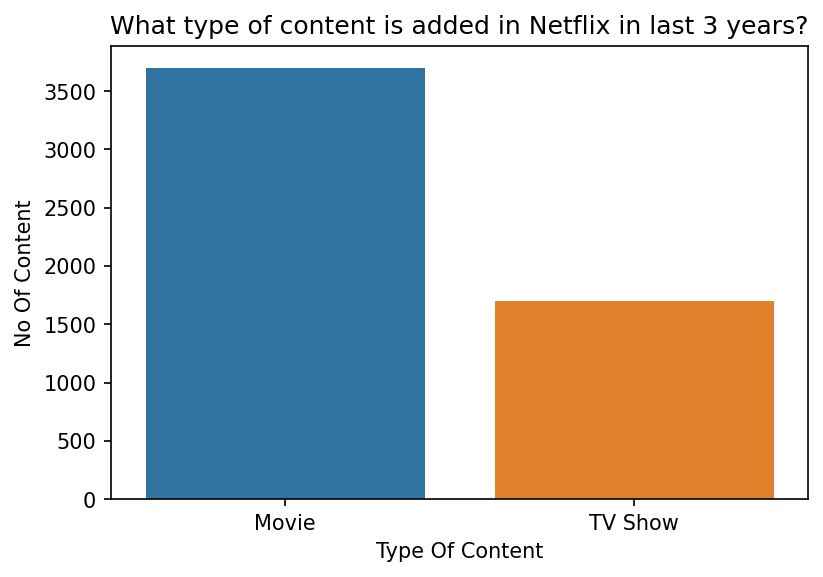

In [99]:
plt.figure(dpi=150)
sns.barplot(x=list(cast_plot.index),y=list(cast_plot))

plt.xlabel('Type Of Content')
plt.ylabel('No Of Content')
plt.title('What type of content is added in Netflix in last 3 years?')
plt.savefig('Image8.jpg')
plt.show()


# Question 7 : 
### In which country is more movies produced?

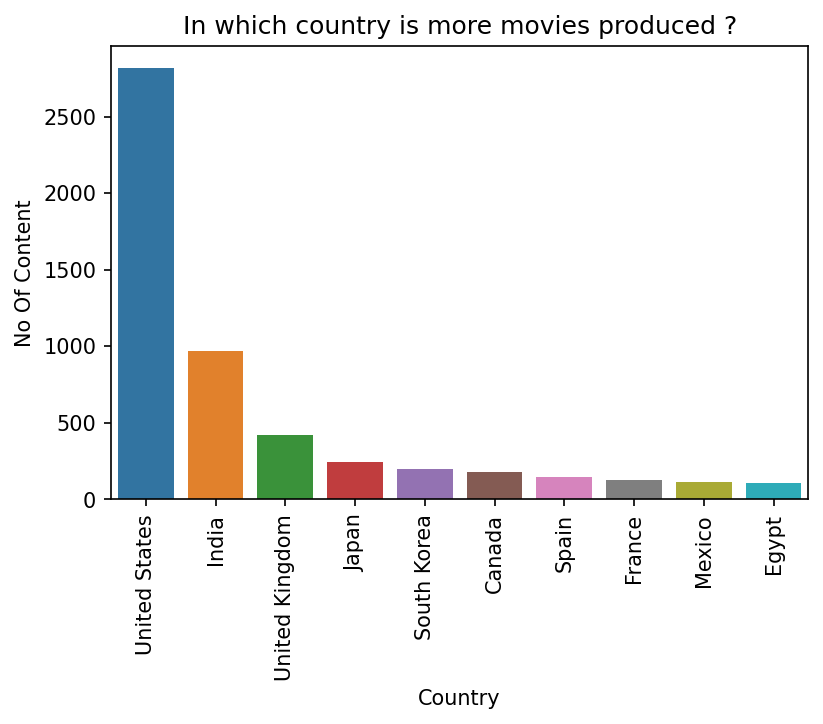

In [100]:
country_plot=final_df.groupby('country').nunique()['show_id'].sort_values(ascending=False)
country_plot
plt.figure(dpi=150)
sns.barplot(x=list(country_plot.iloc[[0, 1, 3, 4, 5, 6, 7, 8, 9, 10]].index),
            y=list(country_plot.iloc[[0, 1, 3, 4, 5, 6, 7, 8, 9, 10]]))
plt.xlabel('Country')
plt.ylabel('No Of Content')
plt.title('In which country is more movies produced ?')
plt.xticks(rotation=90)
plt.savefig('Image9.jpg')
plt.show()


# Question 8 : 
### What kind of rated content is most available in Netflix?

In [101]:
final_df.head()

,show_id,Director,Cast,type,country,release_year,rating,duration,listed_in,Year Added,Month Added
0,s1,Kirsten Johnson,Others,Movie,United States,2020,PG-13,61-90,Documentaries,2021,September
1,s2,No Director,Ama Qamata,TV Show,South Africa,2021,TV-MA,2 Seasons,International TV Shows,2021,September
2,s2,No Director,Ama Qamata,TV Show,South Africa,2021,TV-MA,2 Seasons,TV Dramas,2021,September
3,s2,No Director,Ama Qamata,TV Show,South Africa,2021,TV-MA,2 Seasons,TV Mysteries,2021,September
4,s2,No Director,Khosi Ngema,TV Show,South Africa,2021,TV-MA,2 Seasons,International TV Shows,2021,September


In [102]:
final_df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

- TV-Y - Designed to be appropriate for all children

- TV-Y7 - Suitable for ages 7 and up

- G - Suitable for General Audiences

- TV-G - Suitable for General Audiences

- PG - Parental Guidance suggested

- TV-PG - Parental Guidance suggested

- PG-13 - Parents strongly cautioned. May be Inappropriate for ages 12 and under.

- TV-14 - Parents strongly cautioned. May not be suitable for ages 14 and under.

- R - Restricted. May be inappropriate for ages 17 and under.

- TV-MA - For Mature Audiences. May not be suitable for ages 17 and under.

- NC-17 - Inappropriate for ages 17 and under

- NR - Stands for No Result. It occurs when a film is not submitted to the MPAA for rating.

- UR - It means unrated, which means the film hasn’t been submitted to the MPAA for a rating.

- TV-Y7-FV - Indicates that the content is designed for children aged 7 and older, and contains “fantasy violence” that may be more intense or combative than other TV-Y7 programs. 

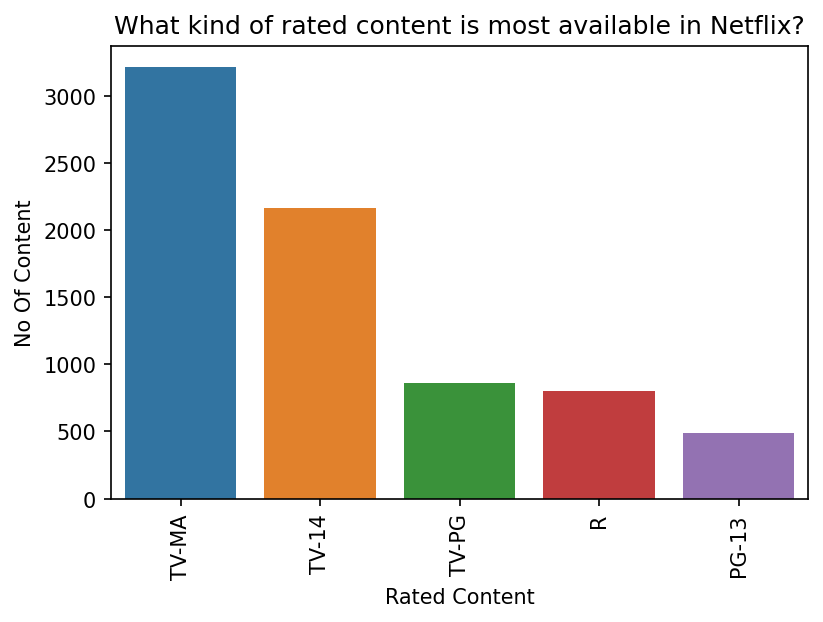

In [103]:
rating_plot=final_df.groupby('rating').nunique()['show_id'].sort_values(ascending=False)
rating_plot
plt.figure(dpi=150)
sns.barplot(x=list(rating_plot.index[:5]),
            y=list(rating_plot[:5]))
plt.xticks(rotation=90)
plt.xlabel('Rated Content')
plt.ylabel('No Of Content')
plt.title('What kind of rated content is most available in Netflix?')
plt.savefig('Image10.jpg')
plt.show()


# Question 9 : 
### Which is the most popular genre?

In [104]:
final_df.head()

,show_id,Director,Cast,type,country,release_year,rating,duration,listed_in,Year Added,Month Added
0,s1,Kirsten Johnson,Others,Movie,United States,2020,PG-13,61-90,Documentaries,2021,September
1,s2,No Director,Ama Qamata,TV Show,South Africa,2021,TV-MA,2 Seasons,International TV Shows,2021,September
2,s2,No Director,Ama Qamata,TV Show,South Africa,2021,TV-MA,2 Seasons,TV Dramas,2021,September
3,s2,No Director,Ama Qamata,TV Show,South Africa,2021,TV-MA,2 Seasons,TV Mysteries,2021,September
4,s2,No Director,Khosi Ngema,TV Show,South Africa,2021,TV-MA,2 Seasons,International TV Shows,2021,September


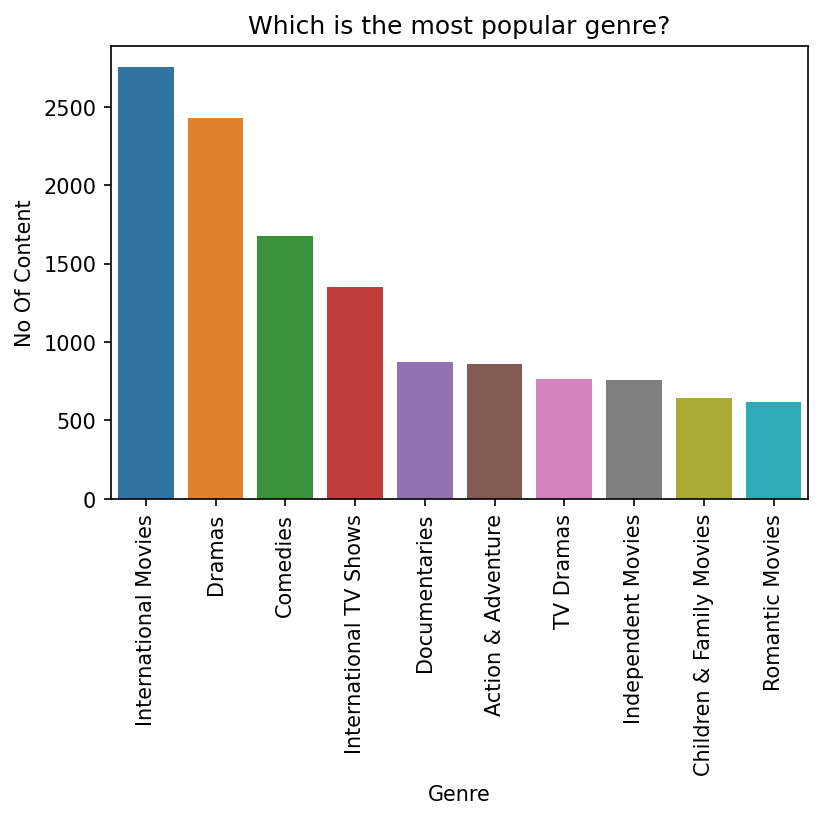

In [105]:
listed_in_plot=final_df.groupby('listed_in').nunique()['show_id'].sort_values(ascending=False)
listed_in_plot
plt.figure(dpi=150)
sns.barplot(x=list(listed_in_plot.index[:10]),
            y=list(listed_in_plot[:10]))
plt.xlabel('Genre')
plt.ylabel('No Of Content')
plt.title('Which is the most popular genre?')
plt.xticks(rotation=90)
plt.savefig('Image11.jpg')
plt.show()


# Question 10 : 
### What is the most preferred duration for each type of content?

In [106]:
final_df.head()

,show_id,Director,Cast,type,country,release_year,rating,duration,listed_in,Year Added,Month Added
0,s1,Kirsten Johnson,Others,Movie,United States,2020,PG-13,61-90,Documentaries,2021,September
1,s2,No Director,Ama Qamata,TV Show,South Africa,2021,TV-MA,2 Seasons,International TV Shows,2021,September
2,s2,No Director,Ama Qamata,TV Show,South Africa,2021,TV-MA,2 Seasons,TV Dramas,2021,September
3,s2,No Director,Ama Qamata,TV Show,South Africa,2021,TV-MA,2 Seasons,TV Mysteries,2021,September
4,s2,No Director,Khosi Ngema,TV Show,South Africa,2021,TV-MA,2 Seasons,International TV Shows,2021,September


In [107]:
duration_plot=final_df.groupby(by=['type','duration']).nunique()['show_id']
duration_plot


type     duration  
Movie    0-30           130
         121-150        897
         151-180        198
         31-60          357
         61-90         1506
         91-120        2996
         Above 180       47
TV Show  1 Season      1793
         10 Seasons       7
         11 Seasons       2
         12 Seasons       2
         13 Seasons       3
         15 Seasons       2
         17 Seasons       1
         2 Seasons      425
         3 Seasons      199
         4 Seasons       95
         5 Seasons       65
         6 Seasons       33
         7 Seasons       23
         8 Seasons       17
         9 Seasons        9
Name: show_id, dtype: int64

In [108]:
movie_plot=duration_plot.loc['Movie'].sort_values(ascending=False)
movie_plot

duration
91-120       2996
61-90        1506
121-150       897
31-60         357
151-180       198
0-30          130
Above 180      47
Name: show_id, dtype: int64

In [109]:
tv_show_plot=duration_plot.loc['TV Show'].sort_values(ascending=False)
tv_show_plot

duration
1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
11 Seasons       2
12 Seasons       2
15 Seasons       2
17 Seasons       1
Name: show_id, dtype: int64

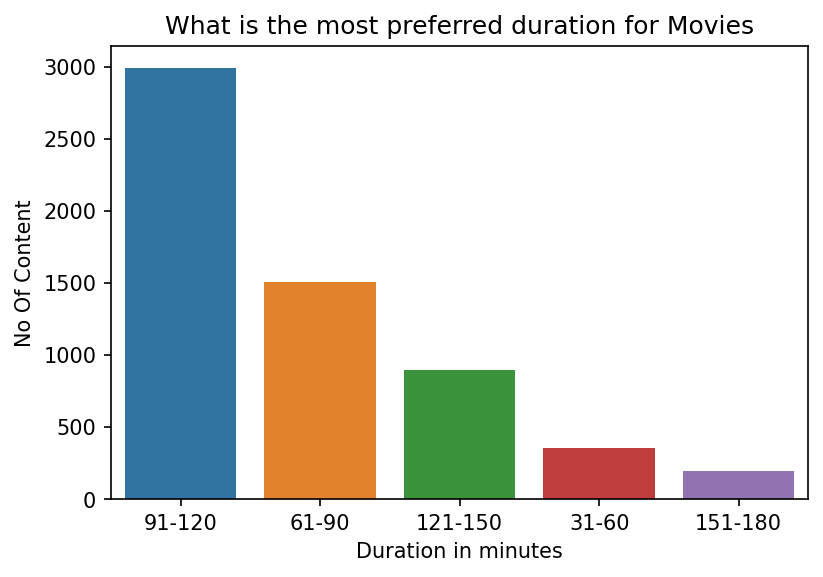

In [110]:
plt.figure(dpi=150)
sns.barplot(x=movie_plot.index[:5],
            y=list(movie_plot[:5]))
# plt.xticks(rotation=90)
plt.xlabel('Duration in minutes')
plt.ylabel('No Of Content')
plt.title('What is the most preferred duration for Movies')
plt.savefig('Image12.jpg')
plt.show()


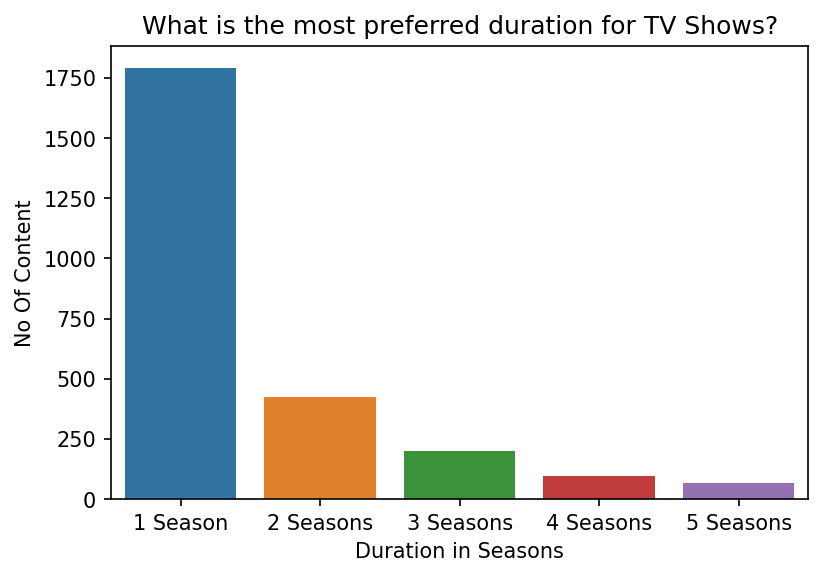

In [111]:
plt.figure(dpi=150)
sns.barplot(x=list(tv_show_plot.index[:5]),
            y=list(tv_show_plot[:5]))
# plt.xticks(rotation=90)
plt.xlabel('Duration in Seasons')
plt.ylabel('No Of Content')
plt.title('What is the most preferred duration for TV Shows?')
plt.savefig('Image13.jpg')
plt.show()


# Question 11: 
### No of content added in Netflix in each month over the last 5 years?

In [112]:
final_df.head()

,show_id,Director,Cast,type,country,release_year,rating,duration,listed_in,Year Added,Month Added
0,s1,Kirsten Johnson,Others,Movie,United States,2020,PG-13,61-90,Documentaries,2021,September
1,s2,No Director,Ama Qamata,TV Show,South Africa,2021,TV-MA,2 Seasons,International TV Shows,2021,September
2,s2,No Director,Ama Qamata,TV Show,South Africa,2021,TV-MA,2 Seasons,TV Dramas,2021,September
3,s2,No Director,Ama Qamata,TV Show,South Africa,2021,TV-MA,2 Seasons,TV Mysteries,2021,September
4,s2,No Director,Khosi Ngema,TV Show,South Africa,2021,TV-MA,2 Seasons,International TV Shows,2021,September


In [113]:
year_month_df = final_df.groupby(['Year Added','Month Added']).nunique()['show_id']
year_month_df=year_month_df.loc[[2017,2018,2019,2020,2021]]
year_month_df

Year Added  Month Added
2017        April           93
            August         115
            December       118
            February        82
            January         72
            July            79
            June            94
            March          125
            May             86
            November        85
            October        126
            September      113
2018        April          115
            August         164
            December       185
            February        87
            January        129
            July           152
            June            78
            March          173
            May             97
            November       154
            October        191
            September      124
2019        April          162
            August         131
            December       215
            February       148
            January        153
            July           157
            June           168
            Mar

In [114]:
def function(series):
    indexes=set(series.index)
    dict1={}
    for month in ['January','February','March','April','May',
                'June','July','August','September','October','November','December']:
        
        if month in indexes:
            dict1[month]=series.loc[month]
        
        else:
            dict1[month]=0
        
    return pd.Series(dict1)

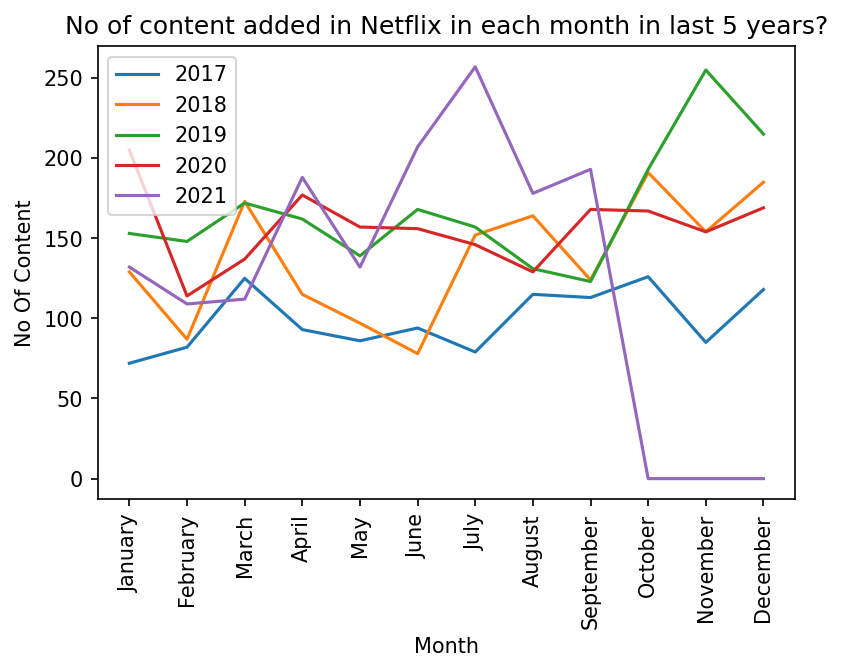

In [115]:
plt.figure(dpi=150)
for year in [2017,2018,2019,2020,2021]:
    series=function(year_month_df.loc[year])
    sns.lineplot(x=['January','February','March','April','May',
                'June','July','August','September','October','November','December'],
                y=series.loc[['January','February','March','April','May',
                'June','July','August','September','October','November','December']])
plt.legend([2017,2018,2019,2020,2021])
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('No Of Content')
plt.title('No of content added in Netflix in each month in last 5 years?')
plt.savefig('Image14.jpg')
plt.show()


# Final Analysis

The given dataset has 8807 rows and 12 columns, out of which we can drop 2 columns - description and title, which are nominal columns and would not provide much scope for deriving insights from the data, which would leave us with 10 columns. The grain of the data is the column show_id which is a unique identifier for every row. All the columns are of object type except release year, which is of the type integer. From the column date_added, we can make 2 new columns - Year Added of type integer and Month Added of type object and finally drop the original column date_added. We would finally be left with 11 columns in total.

Using the info method, we observed that the columns - director, cast, country, date_added, rating and duration had Nan values. All of the Nan values were filled with a certain value depending on the count of missing values and nature of the column, and none of the rows were dropped.


At the end of the above steps, all the 11 columns had 8807 non-null values.

# Recommendations :

- Since from the last few years, there has been an increase in the no of TV shows being released and added on Netflix year on year, and decrease in the no of movies being released and added on Netflix year on year, it shows that there is an increasing demand for TV shows, and therefore Netflix should try to add more TV shows going forward.


- Even though there has been an increasing trend for TV shows, but in the last 3 years, the no of movies added compared to TV shows is twice, therefore Netflix should try to add more TV shows on its platform.


- The months May and February are the months in which content added on Netflix is the least. Therefore Netflix can try to add more content in these 2 months to ensure that people have enough content options during May and February.


- Netflix should try to add more content for the most popular directors such as Rajiv Chilaka, Jan Suter and Raul Campos.


- Netflix should try to add more content for the most popular casts such as Anupam Kher and Shahrukh Khan. Also, the presence of casts such as Julie Tejwani, Rupa Bhimani and Takahiro Sakurai in the top 10 tells us that animated movies are very popular and Netflix should try to add more animated movies as well.


- Netflix should try to add more content having ratings â€“ TV-MA and TV-14.


- Netflix should try to add more content which are produced in the United States, as clearly it is the most popular country where content is produced.


- Netflix should try to add more movies which have a duration in the range of 91 to 120 minutes.


- Netflix should try to add more TV shows which have 1 season.


- Netflix should try to add more content for the genres - International Movies, Dramas and Comedies.